<a href="https://colab.research.google.com/github/goal2002man/USD_Computer_Vision_Final/blob/With_YOLOv5/YOLOv5_License_Plate_Detector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Automatic License Plate Detection & Recognition**

In [1]:
import pandas as pd
import urllib
import matplotlib.pyplot as plt
import numpy as np
import cv2
import glob
import os
import time
import PIL
from PIL import Image

from keras.applications.vgg16 import VGG16
from keras.layers import Flatten, Dense, Conv2D, MaxPooling2D, Input, Dropout
from keras.models import Model, Sequential
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
!git clone https://github.com/ultralytics/yolov5

Cloning into 'yolov5'...
remote: Enumerating objects: 14302, done.
remote: Counting objects: 100% (60/60), done.
remote: Compressing objects: 100% (47/47), done.
remote: Total 14302 (delta 26), reused 31 (delta 13), pack-reused 14242
Receiving objects: 100% (14302/14302), 13.65 MiB | 18.92 MiB/s, done.
Resolving deltas: 100% (9826/9826), done.


In [4]:
# Installing requirements
!pip install -r yolov5/requirements.txt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 182 kB 32.9 MB/s 
     |████████████████████████████████| 62 kB 1.8 MB/s 
     |████████████████████████████████| 1.6 MB 57.5 MB/s 


In [5]:
# Downloading pre-trained model
!python yolov5/detect.py --weights yolov5s.pt --img 640 --conf 0.25 --source yolov5/data/images

detect: weights=['yolov5s.pt'], source=yolov5/data/images, data=yolov5/data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=yolov5/runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-23-g5dc1ce4 Python-3.8.15 torch-1.12.1+cu113 CUDA:0 (Tesla T4, 15110MiB)

100% 14.1M/14.1M [00:00<00:00, 251MB/s]

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
image 1/2 /content/yolov5/data/images/bus.jpg: 640x480 4 persons, 1 bus, 17.1ms
image 2/2 /content/yolov5/data/images/zidane.jpg: 384x640 2 persons, 2 ties, 16.9ms
Speed: 0.5ms pre-process, 17.0ms inference, 19.6ms NMS per image at shape (1, 3, 640, 640)
Results saved to yolov5/runs/detect/exp


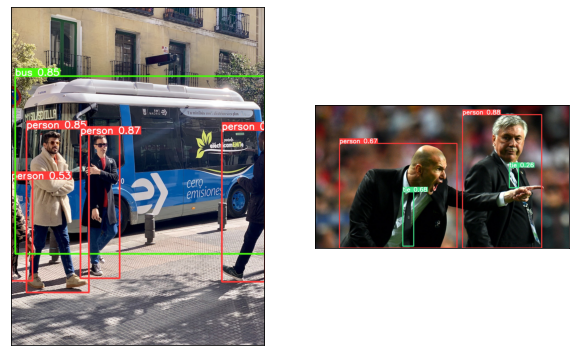

In [6]:
# Checking the model
data_path= 'yolov5/runs/detect/exp'
f, adx = plt.subplots(nrows=1, ncols=2, figsize=(10,10))
adx = adx.flatten()
filenames = ['bus.jpg', 'zidane.jpg']
for i in range(2): 
  file_to_open = str(data_path) + '/' + filenames[i]
  image = PIL.Image.open(file_to_open)              # Use Pillow here to plot the image
  adx[i].imshow(image)
  adx[i].set_xticks([])
  adx[i].set_yticks([])

**TRAINING - LICENSE PLATE DETECTOR**

In [7]:
dataset_location = '/content/gdrive/My\ Drive/Colab\ Notebooks/Computer_Vision/Final_Project/License_Plates_yolov5'

In [8]:
!python ./yolov5/train.py --img 300 --batch 16 --epochs 100 --data {dataset_location}/data.yaml --weights ./yolov5s.pt

train: weights=./yolov5s.pt, cfg=, data=/content/gdrive/My Drive/Colab Notebooks/Computer_Vision/Final_Project/License_Plates_yolov5/data.yaml, hyp=yolov5/data/hyps/hyp.scratch-low.yaml, epochs=100, batch_size=16, imgsz=300, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=yolov5/runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v7.0-23-g5dc1ce4 Python-3.8.15 torch-1.12.1+cu113 CUDA:0 (Tesla T4, 15110MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, 

In [9]:
!ls -lrth yolov5/runs/train/exp

total 5.2M
-rw-r--r-- 1 root root  373 Dec  5 17:10 hyp.yaml
-rw-r--r-- 1 root root 1.1K Dec  5 17:10 opt.yaml
-rw-r--r-- 1 root root 294K Dec  5 17:11 labels_correlogram.jpg
-rw-r--r-- 1 root root 368K Dec  5 17:11 labels.jpg
-rw-r--r-- 1 root root 334K Dec  5 17:11 train_batch0.jpg
-rw-r--r-- 1 root root 343K Dec  5 17:11 train_batch1.jpg
-rw-r--r-- 1 root root 333K Dec  5 17:11 train_batch2.jpg
drwxr-xr-x 2 root root 4.0K Dec  5 17:11 weights
-rw-r--r-- 1 root root  29K Dec  5 17:22 results.csv
-rw-r--r-- 1 root root 399K Dec  5 17:22 val_batch0_labels.jpg
-rw-r--r-- 1 root root 413K Dec  5 17:22 val_batch0_pred.jpg
-rw-r--r-- 1 root root 154K Dec  5 17:22 val_batch2_labels.jpg
-rw-r--r-- 1 root root 158K Dec  5 17:22 val_batch2_pred.jpg
-rw-r--r-- 1 root root 400K Dec  5 17:22 val_batch1_pred.jpg
-rw-r--r-- 1 root root 384K Dec  5 17:22 val_batch1_labels.jpg
-rw-r--r-- 1 root root 138K Dec  5 17:22 F1_curve.png
-rw-r--r-- 1 root root 113K Dec  5 17:22 PR_curve.png
-rw-r--r-- 1 root

In [10]:
%cp -r yolov5/runs/train/exp /content/gdrive/My\ Drive/Colab\ Notebooks/Computer_Vision/Final_Project/

**TESTING LICENSE PLATE DETECTOR**

In [11]:
!python ./yolov5/detect.py --img 320 --source {dataset_location}/test/images --weights ./yolov5/runs/train/exp/weights/best.pt --conf-thres 0.4

detect: weights=['./yolov5/runs/train/exp/weights/best.pt'], source=/content/gdrive/My Drive/Colab Notebooks/Computer_Vision/Final_Project/License_Plates_yolov5/test/images, data=yolov5/data/coco128.yaml, imgsz=[320, 320], conf_thres=0.4, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=yolov5/runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-23-g5dc1ce4 Python-3.8.15 torch-1.12.1+cu113 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
Model summary: 157 layers, 7015519 parameters, 0 gradients, 15.8 GFLOPs
image 1/35 /content/gdrive/My Drive/Colab Notebooks/Computer_Vision/Final_Project/License_Plates_yolov5/test/images/b15d6c0bdf90226d_jpg.rf.775557ba6aaf7d76a8d4bb04f66d8fc5.jpg: 320x320 1 license-plate, 1 vehicle, 8.2ms
image 2/35 /content/

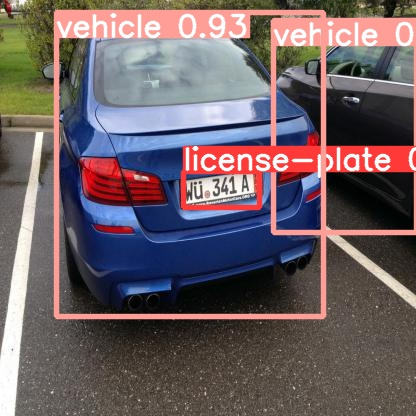

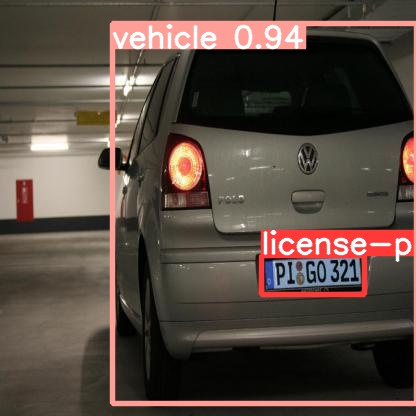

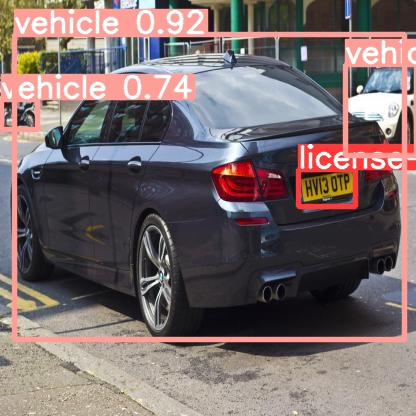

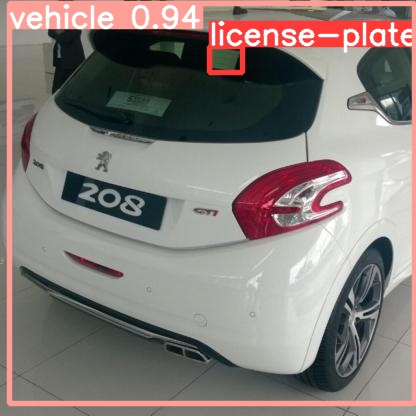

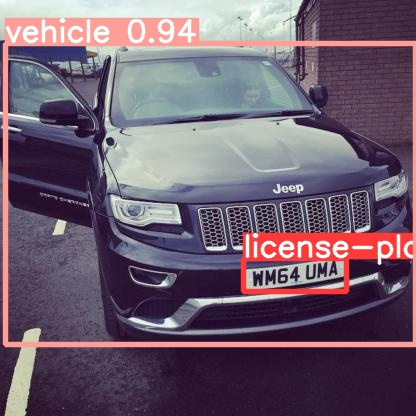

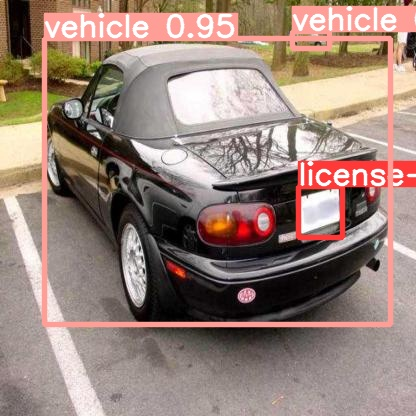

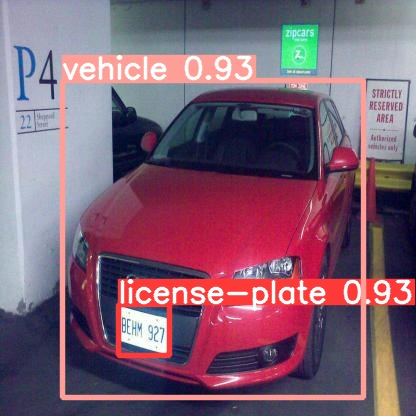

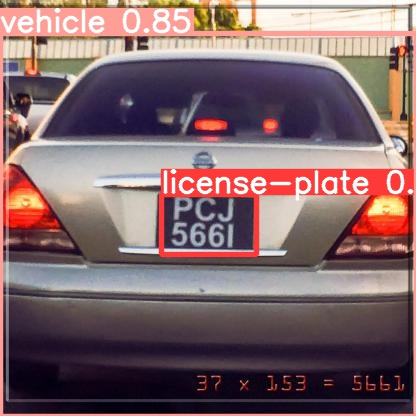

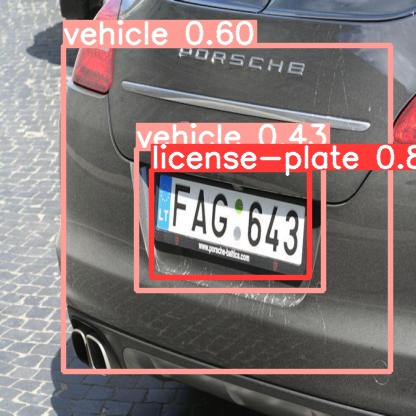

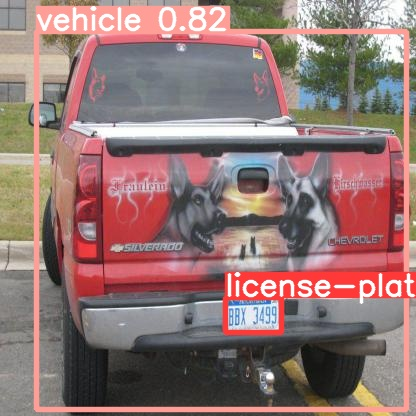

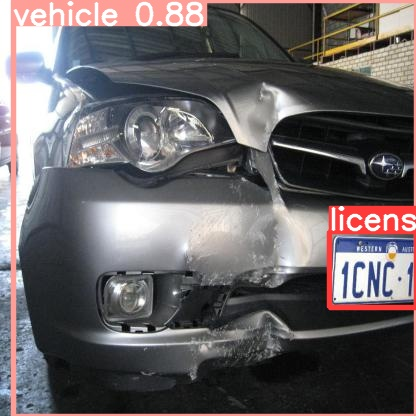

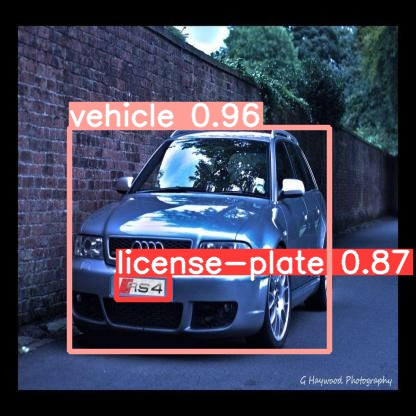

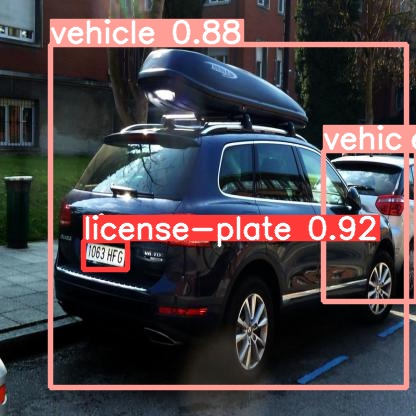

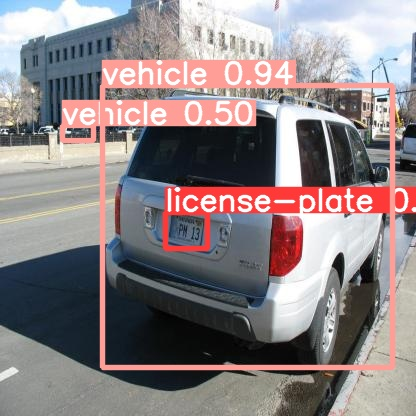

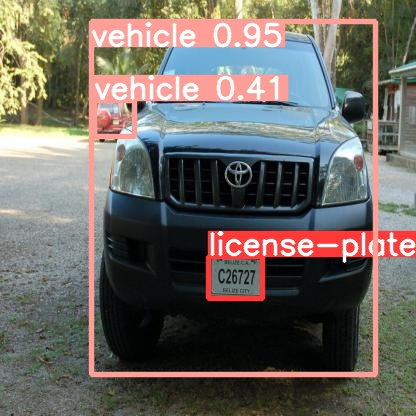

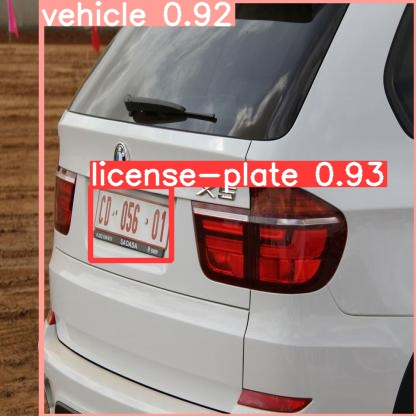

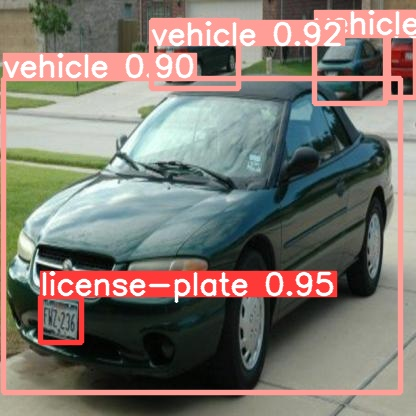

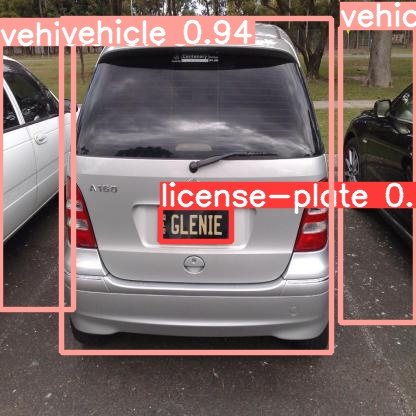

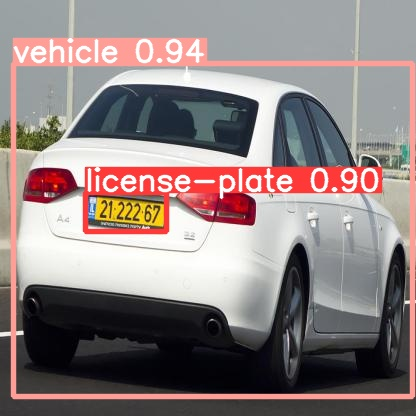

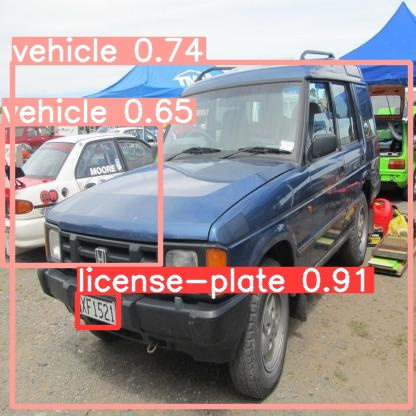

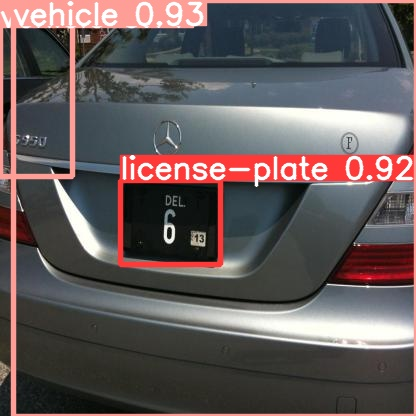

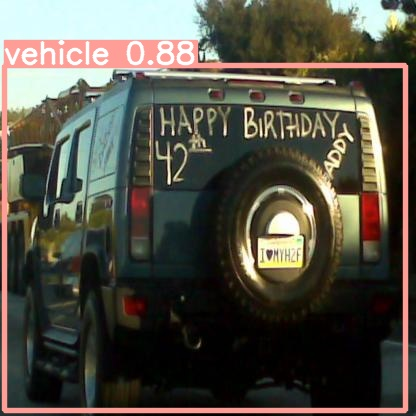

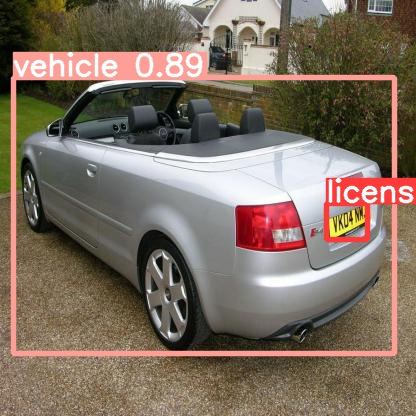

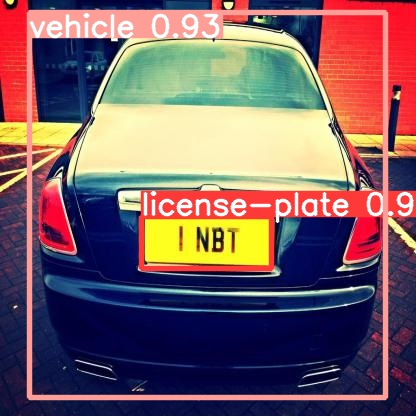

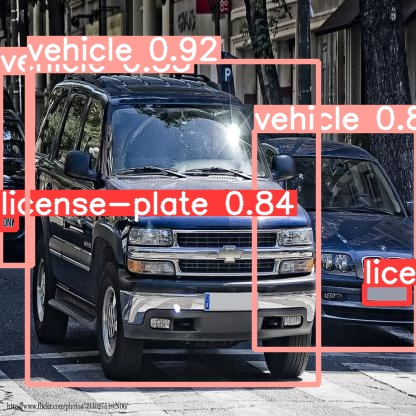

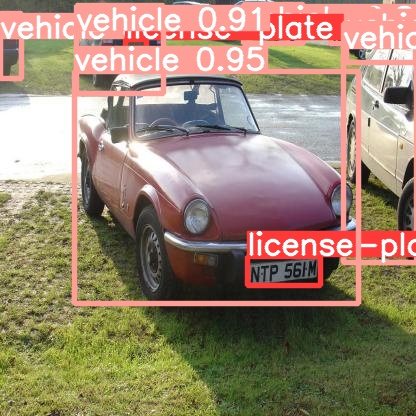

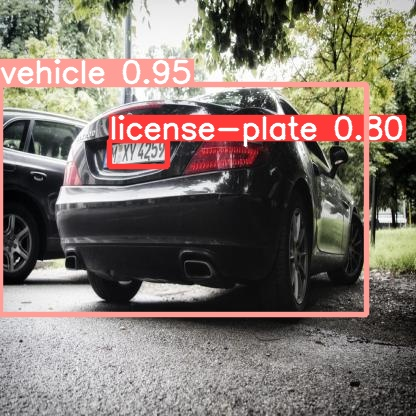

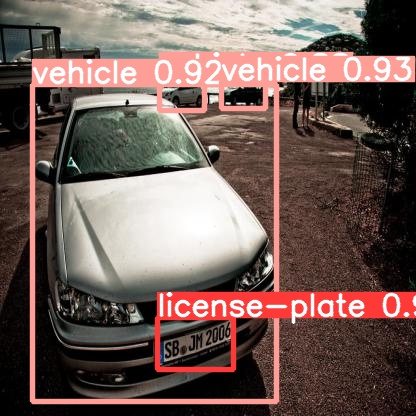

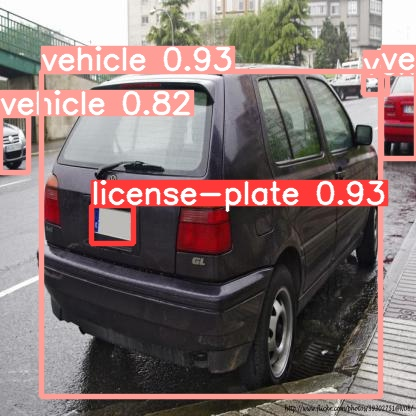

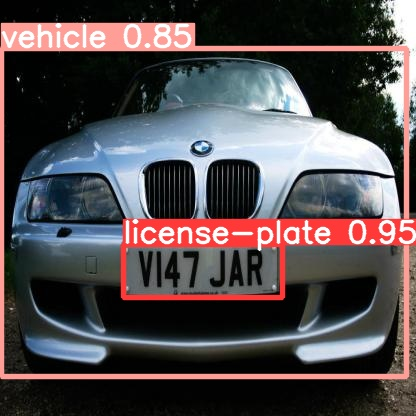

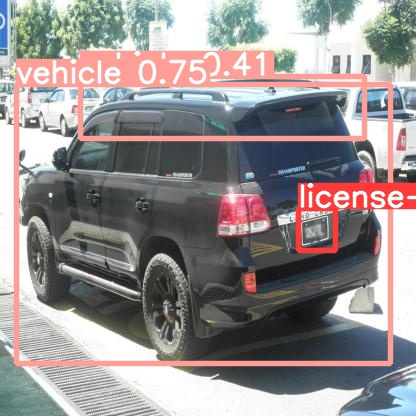

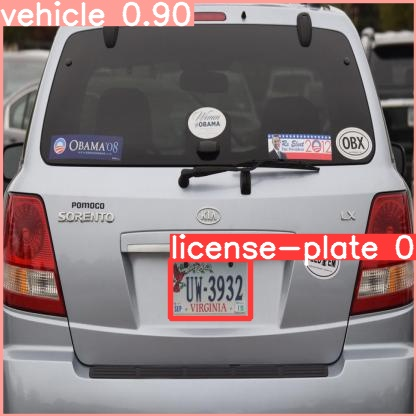

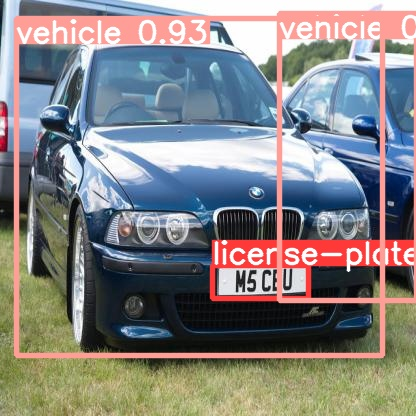

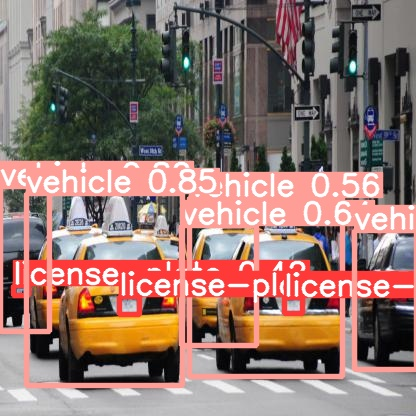

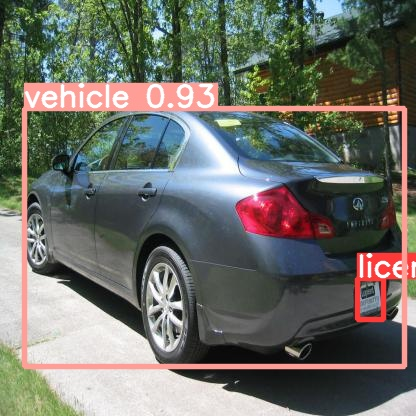

In [12]:
import glob
from IPython.display import Image, display

for imageName in glob.glob('/content/yolov5/runs/detect/exp2/*.jpg'): #assuming JPG
    display(Image(filename=imageName))
    print("\n")

**PART 2: CHARACHTER SEGMENTATION**

In [13]:
import torch
from google.colab.patches import cv2_imshow
from imutils import perspective


In [14]:
folder_test_results_lp_detect = 'yolov5/runs/detect/exp2'
path_yolo_best_weights = './yolov5/runs/train/exp/weights/best.pt'
dataset_location_wo_slash = '/content/gdrive/My Drive/Colab Notebooks/Computer_Vision/Final_Project/License_Plates_yolov5'


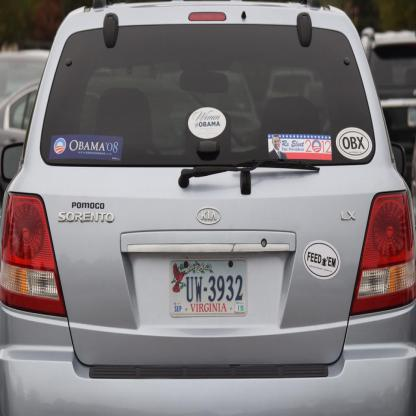

YOLOv5 🚀 v7.0-23-g5dc1ce4 Python-3.8.15 torch-1.12.1+cu113 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
Model summary: 157 layers, 7015519 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 
WARNING ⚠️ NMS time limit 0.550s exceeded


In [15]:
filename_test = dataset_location_wo_slash + '/test/images/b25d7d2cb7abf86b_jpg.rf.36edce738b0e69965e001035d6f85ab3.jpg'
input_images = cv2.imread(filename_test)
cv2_imshow(input_images)
lpd_model = torch.hub.load('yolov5/', 'custom', path=path_yolo_best_weights, source='local')  # local repo

results = lpd_model(input_images)

In [16]:
# Coordinates of bounding box with highest confidence interval
results.print()  
boxes = results.pandas().xyxy[0]  
bb_xmin = boxes.loc[0].at["xmin"]
bb_xmax = boxes.loc[0].at["xmax"]
bb_ymin = boxes.loc[0].at["ymin"]
bb_ymax = boxes.loc[0].at["ymax"]

image 1/1: 416x416 2 license-plates
Speed: 5.6ms pre-process, 13.7ms inference, 667.1ms NMS per image at shape (1, 3, 640, 640)


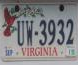

In [17]:
# Image patch for character segmentation
img_for_char_segm = input_images[round(bb_ymin):round(bb_ymax), round(bb_xmin):round(bb_xmax)]
cv2_imshow(img_for_char_segm)